# Workshop 3: Advanced Techniques

In this workshop we will learn techniques to increase the performance of CNN and how to use state of the art architectures. The structure of the workshop will be the following:



1.   Dropout
2.   Batch Normalization
3.   Data Augmentation
4.   Transfer learning



## 1. Dropout

In [1]:
# Import dependence for downloading CIFAR10
from tensorflow import keras
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Import dependence for handling arrays
import numpy as np

In [4]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [5]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [6]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [7]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [8]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [9]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [10]:
# Import depence for CNN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [11]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [12]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4640  

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/50
391/391 [==============================] - 10s 7ms/step - loss: 1.8411 - accuracy: 0.3085 - val_loss: 1.5457 - val_accuracy: 0.4416
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5269 - accuracy: 0.4404 - val_loss: 1.3662 - val_accuracy: 0.5010
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4262 - accuracy: 0.4850 - val_loss: 1.2882 - val_accuracy: 0.5338
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3535 - accuracy: 0.5112 - val_loss: 1.2557 - val_accuracy: 0.5486
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3061 - accuracy: 0.5301 - val_loss: 1.2210 - val_accuracy: 0.5658
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2725 - accuracy: 0.5437 - val_loss: 1.2035 - val_accuracy: 0.5596
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2380 - accuracy: 0.5555 - val_loss: 1.1651 - val_accuracy: 0.5838
Epoch

In [15]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt

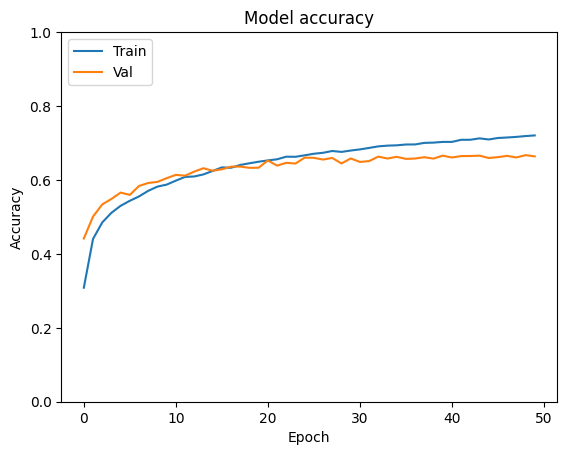

In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

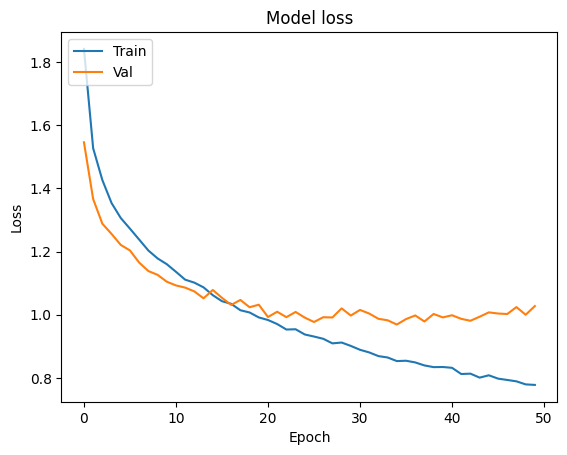

In [17]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## 2. Batch Normalization

In [18]:
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [19]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
bn_1 = BatchNormalization()(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(bn_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
bn_2 = BatchNormalization()(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(bn_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
bn_3 = BatchNormalization()(conv_layer_3)
flatten_layer = Flatten()(bn_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 6s 7ms/step - loss: 1.7314 - accuracy: 0.3902 - val_loss: 1.6047 - val_accuracy: 0.4350
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3712 - accuracy: 0.5114 - val_loss: 1.4726 - val_accuracy: 0.4902
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 1.2404 - accuracy: 0.5614 - val_loss: 1.3392 - val_accuracy: 0.5334
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1555 - accuracy: 0.5904 - val_loss: 1.0828 - val_accuracy: 0.6234
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 1.0954 - accuracy: 0.6112 - val_loss: 1.1681 - val_accuracy: 0.5910
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0532 - accuracy: 0.6262 - val_loss: 1.0169 - val_accuracy: 0.6432
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0068 - accuracy: 0.6432 - val_loss: 1.0798 - val_accuracy: 0.6266
Epoch 

In [22]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 7s 6ms/step - loss: 0.7544 - accuracy: 0.7260 - val_loss: 0.9548 - val_accuracy: 0.6794
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 0.7429 - accuracy: 0.7317 - val_loss: 1.0301 - val_accuracy: 0.6590
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.7347 - accuracy: 0.7349 - val_loss: 1.1207 - val_accuracy: 0.6314
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.7259 - accuracy: 0.7382 - val_loss: 1.0638 - val_accuracy: 0.6598
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.7136 - accuracy: 0.7424 - val_loss: 0.9737 - val_accuracy: 0.6804
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.7061 - accuracy: 0.7438 - val_loss: 0.9591 - val_accuracy: 0.6836
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6953 - accuracy: 0.7482 - val_loss: 0.9725 - val_accuracy: 0.6904
Epoch 

## 3. Data Augmentation

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# Define data generator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 10,
)

In [26]:
# Function to convert a categorical class to its corresponding string
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

In [27]:
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for
                                          # appropriate visualization

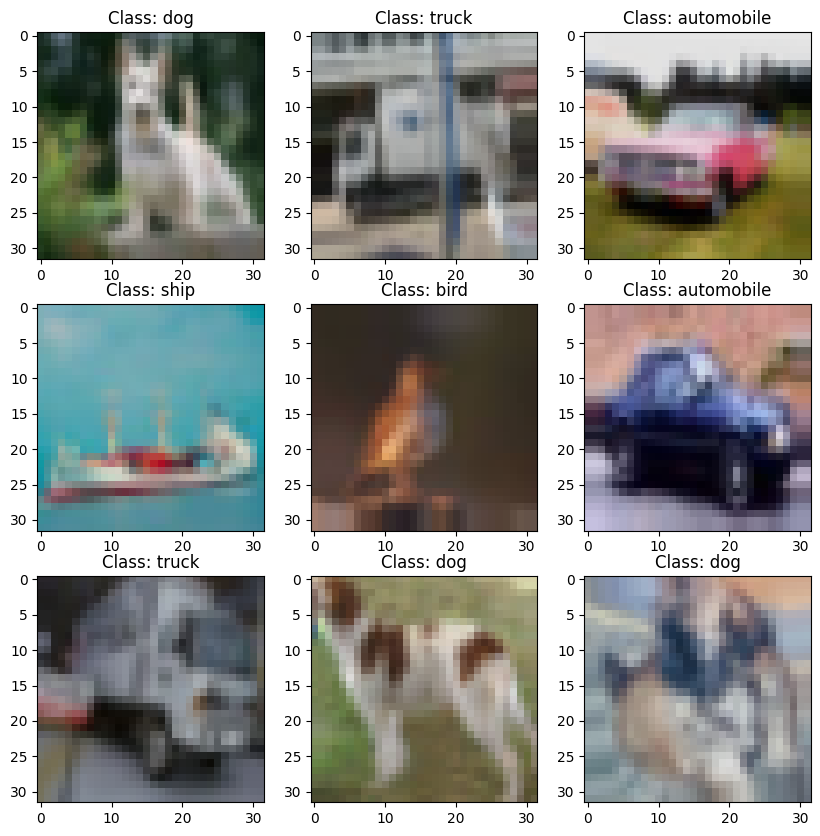

In [28]:
# Show generated data
iterator = train_datagen.flow(X_train_fl, y_train_oh, batch_size=9)
samples, labels = next(iterator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i], interpolation='none')
    class_str = class_to_string(np.argmax(labels[i]))
    plt.title("Class: " + class_str)

In [29]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [30]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,
                                                 batch_size=batch_size),
                              epochs=20,
                              steps_per_epoch=steps_per_epoch,
                              validation_data=(X_val, y_val))

Epoch 1/20


<ipython-input-30-6174ff94f261>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,


500/500 [==============================] - 27s 50ms/step - loss: 1.1235 - accuracy: 0.6168 - val_loss: 0.9914 - val_accuracy: 0.6514
Epoch 2/20
500/500 [==============================] - 25s 49ms/step - loss: 1.0781 - accuracy: 0.6229 - val_loss: 0.9569 - val_accuracy: 0.6660
Epoch 3/20
500/500 [==============================] - 25s 49ms/step - loss: 1.0464 - accuracy: 0.6354 - val_loss: 1.0096 - val_accuracy: 0.6556
Epoch 4/20
500/500 [==============================] - 25s 50ms/step - loss: 1.0306 - accuracy: 0.6414 - val_loss: 0.9590 - val_accuracy: 0.6634
Epoch 5/20
500/500 [==============================] - 24s 49ms/step - loss: 1.0091 - accuracy: 0.6449 - val_loss: 1.0235 - val_accuracy: 0.6490
Epoch 6/20
500/500 [==============================] - 24s 49ms/step - loss: 0.9980 - accuracy: 0.6484 - val_loss: 1.0589 - val_accuracy: 0.6390
Epoch 7/20
500/500 [==============================] - 24s 47ms/step - loss: 0.9903 - accuracy: 0.6497 - val_loss: 0.9552 - val_accuracy: 0.6714
Epo

In [31]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,
                                                 batch_size=batch_size),
                              epochs=100,
                              steps_per_epoch=steps_per_epoch,
                              validation_data=(X_val, y_val))

Epoch 1/100


<ipython-input-31-eccbc49947a6>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,


500/500 [==============================] - 24s 48ms/step - loss: 0.9258 - accuracy: 0.6738 - val_loss: 0.9481 - val_accuracy: 0.6704
Epoch 2/100
500/500 [==============================] - 25s 50ms/step - loss: 0.9203 - accuracy: 0.6772 - val_loss: 0.9695 - val_accuracy: 0.6638
Epoch 3/100
500/500 [==============================] - 25s 50ms/step - loss: 0.9150 - accuracy: 0.6813 - val_loss: 0.9114 - val_accuracy: 0.6816
Epoch 4/100
500/500 [==============================] - 24s 48ms/step - loss: 0.9123 - accuracy: 0.6810 - val_loss: 0.8574 - val_accuracy: 0.6976
Epoch 5/100
500/500 [==============================] - 25s 50ms/step - loss: 0.9076 - accuracy: 0.6797 - val_loss: 0.8704 - val_accuracy: 0.6942
Epoch 6/100
500/500 [==============================] - 25s 50ms/step - loss: 0.9114 - accuracy: 0.6793 - val_loss: 0.8616 - val_accuracy: 0.6986
Epoch 7/100
500/500 [==============================] - 25s 49ms/step - loss: 0.9055 - accuracy: 0.6809 - val_loss: 0.8367 - val_accuracy: 0.70

KeyboardInterrupt: 

## 4. Transfer Learning

In [1]:
# Import dependences for transfer learning
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import UpSampling2D
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Define the model
resnet_model = ResNet50(weights='imagenet', include_top=False,
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(resnet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50,
                    validation_data=(X_val, y_val))

In [ ]:
# Train the model
batch_size = 20
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,
                                                 batch_size=batch_size),
                              epochs=5,
                              steps_per_epoch=steps_per_epoch,
                              validation_data=(X_val, y_val))

# Exercise 1: Experiment with other pre-trained models to evaluate results

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Descargar el conjunto de datos CIFAR-10
(X_entrenamiento, y_entrenamiento), (X_test_val, y_test_val) = cifar10.load_data()

# Normalizar las imágenes
X_entrenamiento = X_entrenamiento.astype('float32') / 255.0
X_test_val = X_test_val.astype('float32') / 255.0

# Codificación one-hot para las etiquetas
onehot_enc = OneHotEncoder()
y_entrenamiento = onehot_enc.fit_transform(y_entrenamiento.reshape(-1, 1)).toarray()
y_test_val = onehot_enc.transform(y_test_val.reshape(-1, 1)).toarray()

# Dividir el conjunto de datos de test en validación y prueba
num_muestras_test = int(X_test_val.shape[0] / 2)
X_validacion = X_test_val[:num_muestras_test]
y_validacion = y_test_val[:num_muestras_test]
X_prueba = X_test_val[num_muestras_test:]
y_prueba = y_test_val[num_muestras_test:]

# Carga el modelo preentrenado ResNet50
modelo_preentrenado = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela las capas en el modelo preentrenado
for capa in modelo_preentrenado.layers:
    capa.trainable = False

# Crea tus propias capas de clasificación
modelo = Sequential([
    modelo_preentrenado,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Ajusta el número de unidades según tu conjunto de datos
])

# Compila el modelo
modelo.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generator
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
)

# Entrena el modelo con data augmentation
batch_size = 100
steps_per_epoch = X_entrenamiento.shape[0] / batch_size
historia = modelo.fit_generator(train_datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=batch_size),
                                epochs=20,
                                steps_per_epoch=steps_per_epoch,
                                validation_data=(X_validacion, y_validacion))

# Evalúa el modelo
pérdida_prueba, precisión_prueba = modelo.evaluate(X_prueba, y_prueba)
print(f'Pérdida en la prueba: {pérdida_prueba}, Precisión en la prueba: {precisión_prueba}')

# Plot training and validation accuracy
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.ylim(0, 1)
plt.show()

# Plot training and validation loss
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


# Exercise 2: Use the concepts learnt to train a classifier for CIFAR100 dataset

In [ ]:
# Paso 1: Cargar el conjunto de datos CIFAR-100
from keras.datasets import cifar100

# Cargar los datos de entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Paso 2: Preprocesar los datos
import numpy as np
from keras.utils import to_categorical

# Normalizar los valores de píxeles al rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Paso 3: Definir el modelo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Paso 4: Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# Paso 6: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Exactitud en el conjunto de prueba:", test_acc)
